# Grupo de 4

202105833 - Arthur Jung Barreto</br>
202005476 - Gabriel Henrique Barcelos</br>
202010404 - Josiel Pantalẽao Cardoso Silva</br>
202005491 - Julierme Augusto Alves</br>
202105862 - Paulo Victor Brandão Farias Borges</br>

## Nível P:

### Pergunta: Qual é o principal objetivo de um extrator de características robusto?

### Resposta:
O principal objetivo de um extrator de características robusto é identificar e descrever características distintivas em imagens que sejam invariantes a transformações, como rotação, escala e iluminação, a fim de permitir a correspondência e o reconhecimento de objetos ou padrões em diferentes condições.

## Nível M:

### Pergunta: Quais são as etapas principais do algoritmo SIFT ?

### Resposta:
As etapas principais do algoritmo SIFT são:

* Detecção de pontos de interesse (keypoints).

* Localização precisa dos keypoints através de um processo de ajuste subpixel.

* Cálculo da orientação dos keypoints baseado em gradientes para tornar as  
características invariantes à rotação.

* Geração dos descritores dos keypoints, que são vetores que descrevem as características locais em torno dos pontos de interesse.

## Nível G:

### Pergunta: Quais são as principais limitações do algoritmo SURF em comparação com o algoritmo SIFT?

### Resposta:
As principais limitações do algoritmo SURF em comparação com o SIFT são:

* Sensibilidade a mudanças na escala e orientação: O SURF não é tão robusto quanto o SIFT em relação a mudanças bruscas na escala e orientação dos objetos.

* Sensibilidade a mudanças de iluminação: O SURF pode ser sensível a mudanças de iluminação, especialmente quando ocorrem alterações drásticas nas condições de iluminação.

* Complexidade computacional: O SURF é computacionalmente mais rápido que o SIFT, mas ainda requer um processamento significativo, devido à quantidade de cálculos envolvidos na construção dos descritores.

## Questão de programação

Desenvolva um programa que leia uma imagem e execute as seguintes ações:

* Identifique e aplique a cor roxa às bordas encontradas na imagem.

* Identifique objetos com características distintas, como bordas fortes ou texturas únicas, e desenhe retângulos vermelhos ao redor deles.

* Localize as linhas presentes na imagem e desenhe-as utilizando a cor azul.

Implemente esse programa de forma a cumprir essas tarefas específicas ao processar a imagem fornecida.

* Mostre todas as imagens geradas ao final.

Para baixar a imagem utilizada visite o site: https://besthqwallpapers.com/pt/download/28825/5120x2880.

## Ressalva

A imagem que está sendo executada no colab está em uma resolução menor do que a imagem fornencida no link acima, o motivo para isso é de que não é possível enviar um arquivo maior do 25 MB no github. Então tive que diminuir a resolução da imagem.

In [11]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [12]:
def ler_imagem(imagem_path):
  # Carregar a imagem
  imagem = cv2.imread(imagem_path)

  # Converter a imagem para escala de cinza
  imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

  return imagem, imagem_cinza

In [13]:
def extrair_e_desenhar_caracteristicas(imagem, imagem_cinza):
    # Fazer uma cópia da imagem para desenhar os retângulos
    imagem_lines = imagem.copy()
    imagem_borders = imagem.copy()
    imagem_rec = imagem.copy()
    imagem_all = imagem.copy()

    # Aplicar o detector de bordas Canny
    bordas = cv2.Canny(imagem_cinza, 100, 200)

    # Encontrar os contornos na imagem de bordas
    contornos, _ = cv2.findContours(bordas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Aplicar a transformada de Hough para detectar linhas
    linhas = cv2.HoughLinesP(bordas, 1, np.pi/180, threshold=50, minLineLength=50, maxLineGap=10)

    # Desenhar as linhas detectadas na imagem original
    if linhas is not None:
        for linha in linhas:
            x1, y1, x2, y2 = linha[0]
            cv2.line(imagem_lines, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Desenha a linha em azul (BGR)
            cv2.line(imagem_all, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Desenha a linha em azul (BGR)

    # Loop através dos contornos encontrados
    for contorno in contornos:
        # Calcular a área do contorno
        area = cv2.contourArea(contorno)

        # Ignorar contornos muito pequenos
        if area < 100:
            continue

        # Obter as coordenadas do retângulo delimitador
        x, y, w, h = cv2.boundingRect(contorno)

        # Desenhar as bordas com a cor roxa
        cv2.drawContours(imagem_borders, [contorno], 0, (128, 0, 128), 2)
        cv2.drawContours(imagem_all, [contorno], 0, (128, 0, 128), 2)

        # Desenhar um retângulo vermelho ao redor do objeto
        cv2.rectangle(imagem_rec, (x, y), (x+w, y+h), (0, 0, 255), 2)
        cv2.rectangle(imagem_all, (x, y), (x+w, y+h), (0, 0, 255), 2)


    return imagem_lines, imagem_borders, imagem_rec, imagem_all

In [14]:
# Caminho da imagem
imagem_path = "/content/imagem.jpg"
imagem, imagem_cinza = ler_imagem(imagem_path)

# Chamar a função para extrair e desenhar as características
imagem_lines, imagem_borders, imagem_rec, imagem_all = extrair_e_desenhar_caracteristicas(imagem, imagem_cinza)

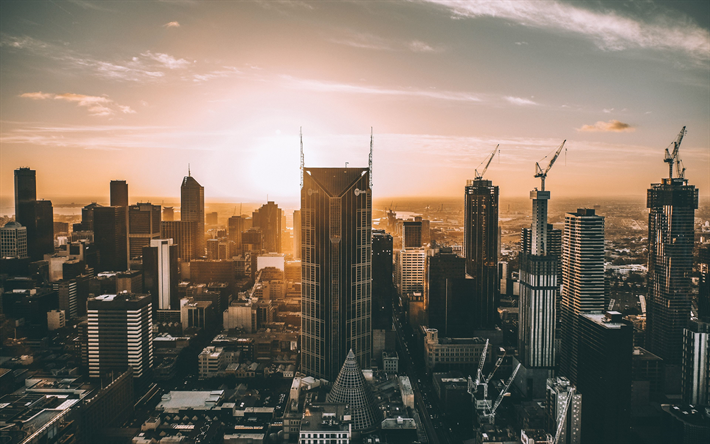

In [15]:
# Imagem Original
cv2_imshow(imagem)

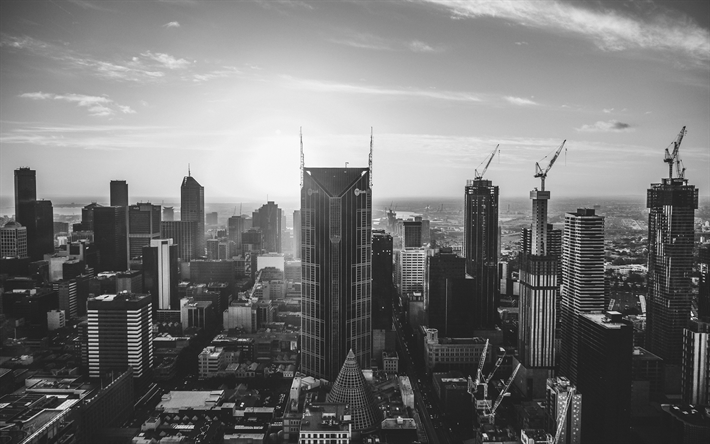

In [16]:
# Imagem em escala de cinza
cv2_imshow(imagem_cinza)

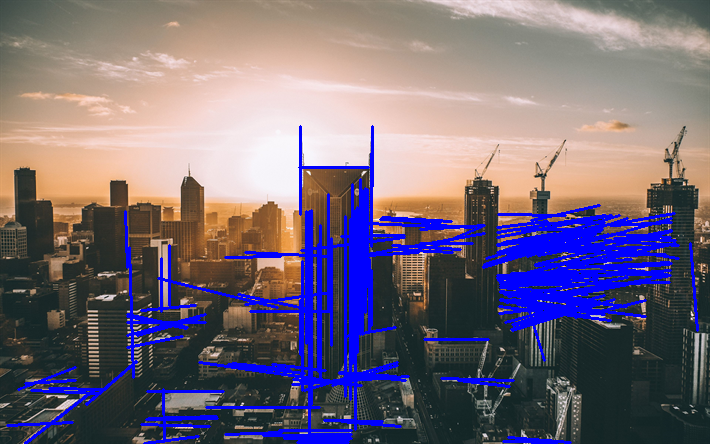

In [17]:
# Imagem com as linhas desenhadas em azul
cv2_imshow(imagem_lines)

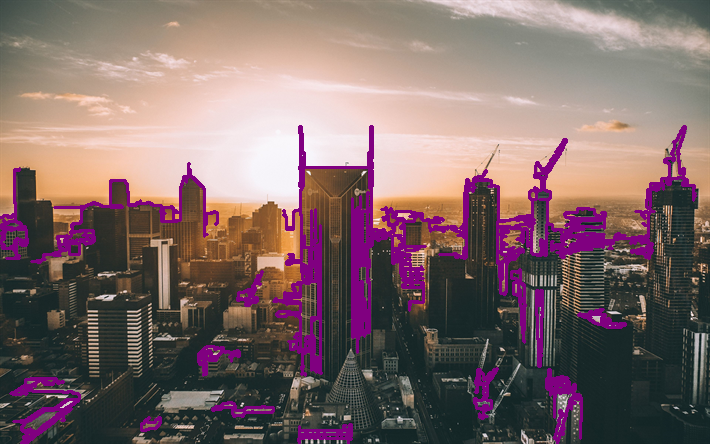

In [18]:
# Imagem com as bordas desenhadas em roxo
cv2_imshow(imagem_borders)

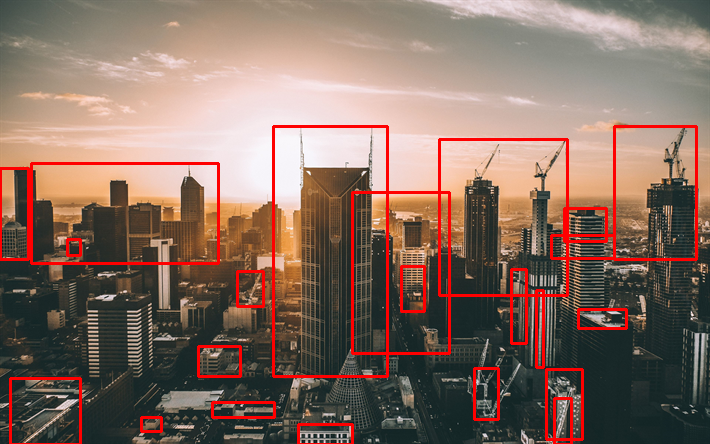

In [19]:
# Imagem com os retangulos desenhados em vermelho
cv2_imshow(imagem_rec)

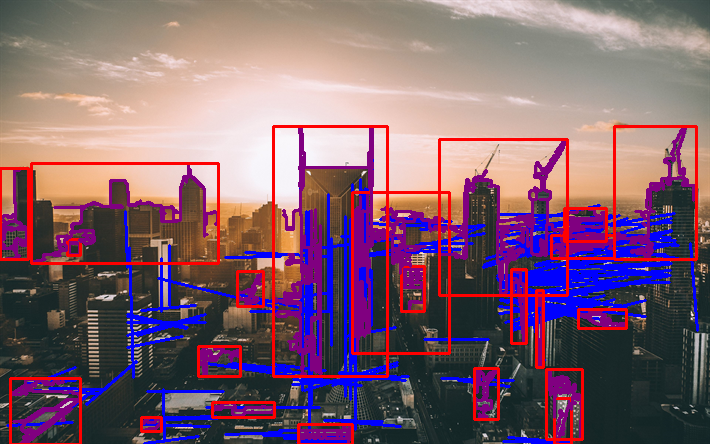

In [20]:
# Imagem com todos os desenhos
cv2_imshow(imagem_all)